# **4-1 - Modeling Customer Lifetime Value**

Marketing and Customer Analytics

---

**Outline**

1. Case 1: CLV Based on Assumption: Sales take place one a year
2. Case 2: Sales occur frequently than 1 a year
3. Case 3: Transaction occur less frequent than once a year
4. Case 4: Simple Retention model
5. Case 5: Estimating Retention Rate
6. Case 6: CLV basic formula
7. Case 7: Basic CLV formula with additional information

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Case 1: Sales take place once a year

$$
\text{CLV}= \text{GC} \cdot \sum^{n}_{i=0}\left[\frac{r^{i}}{(1+d)^{i}}\right] - \text{M} \cdot \sum^{n}_{i=1}\left[\frac{r^{i-1}}{(1+d)^{i-0.5}}\right]
$$

Given:

- `GC` is the (expected) yearly gross contribution margin per customer. It is, therefore, equal to revenues minus cost of sales.
- `M` is the (relevant) promotion costs per customer per year.
- `n` is the length, in years, of the period over which cash flows are to be projected.
- `r` is the yearly retention rate,the proportion of customers expected to continue buying the company’s goods or services in the subsequent year.
- `d` is the yearly discount rate (appropriate for marketing investments).

Assumption:
    
- The length of the projection period, n, highly depends on the industry
- The 0.5 in equation reflects the approximation of the promotion expenses to all occur at the middle of each purchase cycle.
- Sales take place once a year
- Customer retention rate remain constant over time
- Gross contribution margin (GC) per purchase cycle and relevant promotion costs (M) per year per customer remain constant

- Suppose that the insurance company pays, on average, \$50 per customer yearly on promotional expenses
- The yearly retention rate is 75%
- The period of cash flows projection is 10 years
- The yearly gross contribution per customer is expected to amount to \$260
- An appropriate discount rate for marketing activities is 20%

$$
\begin{align*}
\text{CLV} &= \text{GC} ⋅ \sum^{n}_{i=0}\left[\frac{r^{i}}{(1+d)^{i}}\right] - \text{M} ⋅ \sum^{n}_{i=1}\left[\frac{r^{i-1}}{(1+d)^{i-0.5}}\right]
\\
\\
\text{CLV} &= 260 \cdot \sum^{10}_{i=0}\left[\frac{0.75^{i}}{(1+0.2)^{i}}\right] - \text{50} \cdot \sum^{10}_{i=1}\left[\frac{0.75^{i-1}}{(1+0.2)^{i-0.5}}\right]
\\
\\
\text{CLV} &= \$567.08
\end{align*}
$$

In [2]:
def calculate_clv_1(gross_contribution,
                    retention_rate,
                    discount_rate,
                    num_years,
                    promotional_expenses):
    """
    Calculate the Customer Lifetime Value (CLV) for each customer.

    Parameters:
    -----------
    gross_contribution: float
        The gross contribution for each customer

    retention_rate: float
        The yearly retention rate

    discount_rate: float
        The discount rate for marketing activities

    num_years: int
        The period of cash flows projection

    promotional_expenses: float
        The promotional expenses per customer per year

    Returns:
    --------
    clv: float
        The calculated CLV for the customer.
    """
    # Initialize the CLV for the current customer to 0
    clv = 0

    # Loop over the number of years
    for i in range(num_years):
        # Add the discounted gross contribution for year i to the CLV
        clv += gross_contribution * (retention_rate ** i) \
               / ((1 + discount_rate) ** i)

        # Subtract the discounted promotional expenses for year i from the CLV
        # (skip the 1st year because promotional expenses start from the 2nd year)
        if i > 0:
            clv -= promotional_expenses * (retention_rate ** (i - 1)) \
                   / ((1 + discount_rate) ** (i - 0.5))

    # Return the calculated CLV
    return clv

In [3]:
clv = calculate_clv_1(gross_contribution = 260,
                      retention_rate = 0.75,
                      discount_rate = 0.2,
                      num_years = 10,
                      promotional_expenses = 50)

In [4]:
print(f'CLV for customer with constant gross contribution '
      f'over 10 years is: {np.round(clv,2)}')

CLV for customer with constant gross contribution over 10 years is: 567.08


# Case 2: We Sales occur more frequently than once a year

$$
\text{CLV}= \text{GC'} \cdot \sum^{pn}_{i=0}\left[\frac{(r')^{i}}{(1+d)^{i/p}}\right] - \text{M'} \cdot \sum^{pn}_{i=1}\left[\frac{(r')^{i-1}}{(1+d)^{(i-0.5)/p}}\right]
$$

Given

- `GC'` is the (expected) gross contribution mar- gin per customer per sales cycle,
- `M'` is the promotion costs per customer per sales cycle, and
- `r'` is the retention rate per sales cycle.

Assumption

- We consider first the case where sales occur more frequently than once a year
- Let p be the number of cycles (i.e., transactions or sales) per year
- For instance, p is equal to 2 for semiannual purchases/sales,
- And if p is equal to 4 in cases where sales occur quarterly, that is, p = 12 divided by the cycle time in months
- Gross contribution margin (GC) per purchase cycle and relevant promotion costs (M) per year per customer remain constant

Caution

- d is the yearly discount rate (appropriate for marketing investments)
- The number of periods is n ∗ p, while it is not necessary that p be an integer (e.g., p = 2.4 for 5 purchase cycles per year)
- d is indeed (still) the annual discount rate
- The adoption of a nonannual discount rate would imply a change in the financial market; that is not the case here
- The 0.5 is again used in the equation because promotion expenditures in a cycle are assumed to occur in the middle of that cycle

In [5]:
def calculate_clv_2(gross_contribution,
                    retention_rate,
                    discount_rate,
                    num_years,
                    num_cycles_per_year,
                    promotional_expenses):
    """
    Calculate the Customer Lifetime Value (CLV) for each customer.

    Parameters:
    -----------
    gross_contribution: float
        The gross contribution for each customer

    retention_rate: float
        The retention rate per sales cycle

    discount_rate: float
        The yearly discount rate for marketing activities

    num_years: int
        The period of cash flows projection in years

    num_cycles_per_year: int
        The number of sales cycles per year

    promotional_expenses: float
        The promotional expenses per customer per sales cycle

    Returns:
    -----------
    clv: float
        The calculated CLV for the customer.
    """
    # Calculate the adjusted retention rate and discount rate per cycle
    retention_rate_per_cycle = retention_rate ** (1/num_cycles_per_year)

    # Initialize the CLV for the current customer to 0
    clv = 0

    # Loop over the number of years
    for i in range(num_years*num_cycles_per_year):
        # Add the discounted gross contribution for year i to the CLV
        clv += gross_contribution * (retention_rate ** i) \
             / ((1 + discount_rate) ** (i/num_cycles_per_year))

        # Subtract the discounted promotional expenses for year i from the CLV
        # (skip the 1st year because promotional expenses start from the 2nd year)
        if i > 0:
            clv -= promotional_expenses * (retention_rate ** (i - 1)) \
                 / ((1 + discount_rate) ** ((i - 0.5)/num_cycles_per_year))

    # Return the calculated CLV
    return clv

In [6]:
clv_2 = calculate_clv_2(gross_contribution = 125,
                        retention_rate = 0.8,
                        discount_rate = 0.2,
                        num_years = 4,
                        num_cycles_per_year = 2,
                        promotional_expenses = 25)


print(f'CLV for customer with constant gross contribution '
      f'over 10 years is: {np.round(clv_2,2)}')

CLV for customer with constant gross contribution over 10 years is: 347.22


# Case 3: transactions occur less frequently than once a year

$$
\text{CLV}= \text{GC'} \cdot \sum^{n/q}_{i=0}\left[\frac{(r')^{i}}{(1+d)^{iq}}\right] - \text{M'} \cdot \sum^{n}_{i=1}\left[\frac{(r')^{(i-1)/q}}{(1+d)^{(i-0.5)}}\right]
$$

Given
-  In this case, sales/transactions occur less frequently than once a year. In cases of durables, replacements often occur only every few years.
- Let q be the length of a cycle or the num-ber of years between two consecutive sales.
- For example, if a car is leased every 3 years, then q = 3
- To use equation, n/q, as noted earlier for p ∗ n, should be an integer value


Assumption
- Gross contribution margin (GC) per purchase cycle and relevant promotion costs (M) per year per customer remain constant
Example:
- Consider the case of a car dealership where customers lease cars for 3 years
- The company pays \$95 per customer on promotion, yearly
- The cyclical retention rate is (only) 30%
- The average gross contribution margin per car lease per cycle is \$7,000
- An appropriate discount rate is 20%
- The company wants to project its CLV for the next 12 years (12/3 = 4 purchase cycles)

**Create Dataset**

In [7]:
def calculate_clv_3(gross_contribution, retention_rate, discount_rate, num_years, length_of_cycle, promotional_expenses):
    """
    Calculate the Customer Lifetime Value (CLV) based on the
    gross contribution using the provided formula.

    Parameters:
    -----------
    gross_contribution: float
        The gross contribution for each customer

    retention_rate: float
        The cyclical retention rate

    discount_rate: float
        The yearly discount rate for marketing activities

    num_years: int
        The period of cash flows projection in years

    length_of_cycle: int
        The number of years between two consecutive sales

    promotional_expenses: float
        The promotional expenses per customer per year

    Returns:
    --------
    clv: float
        The calculated CLV for the customer.
    """
    # Initialize the CLV for the customer to 0
    clv = 0

    # Calculate the total number of cycles (n/q)
    total_cycles = int(num_years / length_of_cycle)

    # Loop over the cycles
    for i in range(total_cycles + 1):
        # Add the discounted gross contribution for cycle i to the CLV
        clv += (gross_contribution * (retention_rate ** i)) \
             / ((1 + discount_rate) ** (i * length_of_cycle))

    # Subtract the discounted promo expenses for each cycle except the 1st one
    for i in range(1, total_cycles + 1):
        clv -= (promotional_expenses * (retention_rate \
            ** ((i - 1) / length_of_cycle))) / ((1 + discount_rate) \
            **  (i - 0.5))

    # Return the calculated CLV
    return clv


In [8]:
clv_3 = calculate_clv_3(gross_contribution = 7000,
                        retention_rate = 0.3,
                        discount_rate = 0.2,
                        num_years = 12,
                        length_of_cycle = 4,
                        promotional_expenses = 95)

print(f'CLV for customer with constant gross contribution '
      f'over 12 years is: {np.round(clv_3,2)}')

CLV for customer with constant gross contribution over 12 years is: 8007.25


# Case 4: Simple Retention Model

$$
E\left[\text{CLV}\right] = PV \frac{1 + d}{1 + d - r}
$$

Given
- E[CLV] is expected CLV using the sum of the geometric series.
- PV is present value
- r is the retention rate
- d is discount rate

Situation:
- Customer become members
- Pay periodically fees
- Cancel membership at sometime

In [9]:
def calculate_clv_4(r, d, PV):
    """
    Calculate expected CLV using geometric series

    parameter
    ---------
    r: float
        retention rate

    d: float
        discount rate

    PV: float
        present value

    return
    ------
    expected_clv: float
        expected clv
    """

    expected_clv = PV * (1+d)/(1+d-r)

    return expected_clv


$$
E[T] = \frac{1}{(1-r)}
$$

Given

- E[T] = expected number of time until cancellation
- r = retention rate

In [10]:
def calculate_expected_month(r):
    """
    Calculate expected number of month until cancellation

    parameter
    ---------
    r: float
        retention rate

    return
    ------
    expected_month: int
        expected number of month until cancellation
    """
    expected_month = 1 / (1 - r)

    return expected_month


In [11]:
list_retention_rate = [0.9, 0.92, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 0.995]
pv = 10
d = 0.01

In [12]:
# calculate expected month
expected_month = []

for i in list_retention_rate:
    month = calculate_expected_month(r = i)
    expected_month.append(month)

In [13]:
expected_month

[10.000000000000002,
 12.500000000000007,
 16.666666666666654,
 19.999999999999982,
 24.99999999999998,
 33.33333333333331,
 49.99999999999996,
 99.99999999999991,
 199.99999999999983]

In [14]:
# calculate expected clv
expected_clv = []

for r in list_retention_rate:
    clv = calculate_clv_4(r = r, d = d, PV = pv)
    expected_clv.append(clv)

In [15]:
expected_clv

[91.81818181818183,
 112.22222222222226,
 144.28571428571416,
 168.33333333333317,
 201.9999999999998,
 252.49999999999977,
 336.66666666666634,
 504.99999999999955,
 673.3333333333327]

In [16]:
# create dataframe
df = pd.DataFrame({
    'r': list_retention_rate,
    't': expected_month,
    'clv': expected_clv
})

In [17]:
df

,r,t,clv
0,0.900,10.000000,91.818182
1,0.920,12.500000,112.222222
2,0.940,16.666667,144.285714
3,0.950,20.000000,168.333333
4,0.960,25.000000,202.000000
5,0.970,33.333333,252.500000
6,0.980,50.000000,336.666667
7,0.990,100.000000,505.000000
8,0.995,200.000000,673.333333


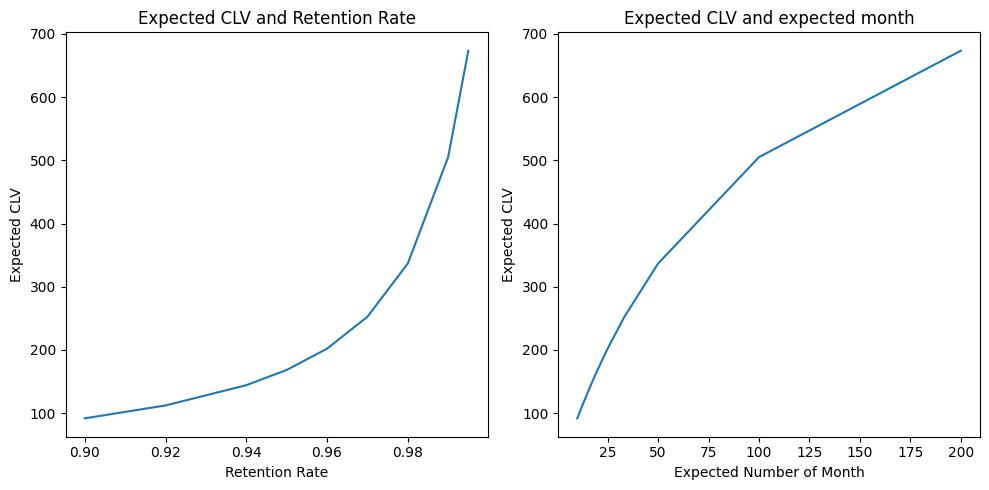

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.lineplot(y='clv', x='r', data=df, ax=ax[0])
ax[0].set_title('Expected CLV and Retention Rate')
ax[0].set_xlabel('Retention Rate')
ax[0].set_ylabel('Expected CLV')

sns.lineplot(y='clv', x='t', data=df, ax=ax[1])
ax[1].set_title('Expected CLV and expected month')
ax[1].set_xlabel('Expected Number of Month')
ax[1].set_ylabel('Expected CLV')

plt.tight_layout()
plt.show()

- CLV increase non-linear with retention rate r
- CLV increase slightly linear with time period t
- This model can be use to model CLV in ISP (e.g., cell phone company, internet provider, TV cable)

# Case 5: Estimating Retention Rates

1. Estimation is difficult because not all customers have cancelled (e.g., they are censored)
2. Suppose n custimers have canceled, and PV are censored
3. $t_1$, $t_2$,...$t_n$ is cancel times and $c_1$, $c_2$,... $c_m$ is the censoring
4. the likelihood is

$$
L(r) = \prod^n_{i=1}(1-r)r^{{t_i}-1}\prod^m_{i=1}r^{ci}
$$

5. the maximum is

$$
\hat{r} = 1 - \frac{n}{\sum t_i + \sum c_i}
$$

6. Example (R=retained, C=canceled, a=acquired)

<center>
<img src="https://sekolahdata-assets.s3.ap-southeast-1.amazonaws.com/notebook-images/marketing-analytics-1/live_8_1.png">
</center>


- n= 5
- m = 3
- $\sum t_{i}$ = 30
- $\sum c_{i}$ = 32
- $\hat{r} = 1 - \frac{5}{(30+32)} \approx$ 92%

# Case 6: Customer Lifetime Value Basic Formula
The definition of customer lifetime value is simple: It represents a customer’s value to a company over a period of time, so we can formulate the CLV by simply multipying:
- average value of the customers (it can be average profit or average revenue)
- with average lifespan of customer (customer duration)

Formula:
- CLV = Average Order Value (AOV) * Average customer lifetime
- Given the average lifetime is 1 / (churn rate)

Example:
- Given AOV value of each customer
- Average monthly retention rate is 70%
- CAC is \$75 each customer
- What is the CLV of each customer? What can we do knowing the CLV?

In [19]:
# Set the random seed
np.random.seed(42)

# Number of samples
num_samples = 1000

# Generate AOV data following a skewed distribution
revenue = np.random.gamma(2, scale=240, size=num_samples)
frequency = np.random.normal(loc=5, scale=1, size=num_samples).astype(int)


# Create the dataframe
df = pd.DataFrame({'Revenue': revenue,
                   'Frequency': frequency})

# create AOV
df['AOV'] = df['Revenue']/df['Frequency']

In [20]:
df.head()

,Revenue,Frequency,AOV
0,574.483054,3,191.494351
1,358.671535,4,89.667884
2,331.748060,3,110.582687
3,331.752551,5,66.350510
4,1115.931459,5,223.186292


Text(0.5, 1.0, 'AOV Distribution')

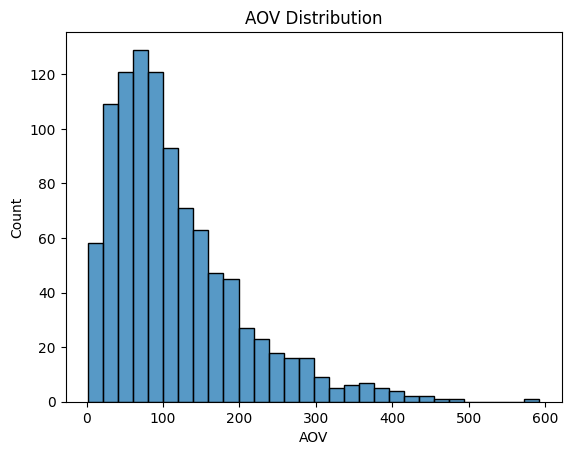

In [21]:
# check distribution
sns.histplot(df['AOV'])
plt.title('AOV Distribution')

In [22]:
# Calculat CLV = AOV * Average lifetime
df['CLV'] = df['AOV'] / (1-0.7)

Text(0.5, 1.0, 'CLV Distribution')

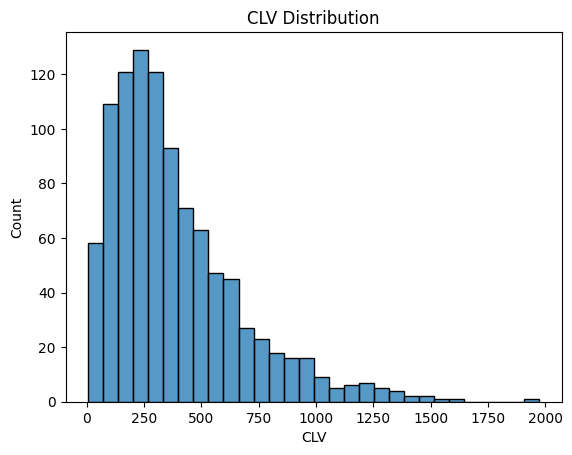

In [23]:
# check distribution
sns.histplot(df['CLV'])
plt.title('CLV Distribution')

In [24]:
# copy data
customer_data = df.copy()

In [25]:
# Rank customers based on CLV in descending order
customer_data['Rank'] = customer_data['CLV'].rank(ascending=False)

# Divide customers into three groups based on rank
num_customers = len(customer_data)
group_size = num_customers // 3

# high value customer
customer_data.loc[customer_data['Rank'] <= group_size, 'Group'] = 'High Value'

# medium value
customer_data.loc[(customer_data['Rank'] > group_size) &
                  (customer_data['Rank'] <= group_size * 2),
                  'Group'] = 'Medium Value'

# low value
customer_data.loc[customer_data['Rank'] > group_size * 2, 'Group'] = 'Low Value'

In [26]:
customer_data.head()

,Revenue,Frequency,AOV,CLV,Rank,Group
0,574.483054,3,191.494351,638.314504,162.0,High Value
1,358.671535,4,89.667884,298.892946,526.0,Medium Value
2,331.748060,3,110.582687,368.608956,407.0,Medium Value
3,331.752551,5,66.350510,221.168367,668.0,Low Value
4,1115.931459,5,223.186292,743.954306,108.0,High Value


Text(0.5, 1.0, 'CLV Boxplot each Segment')

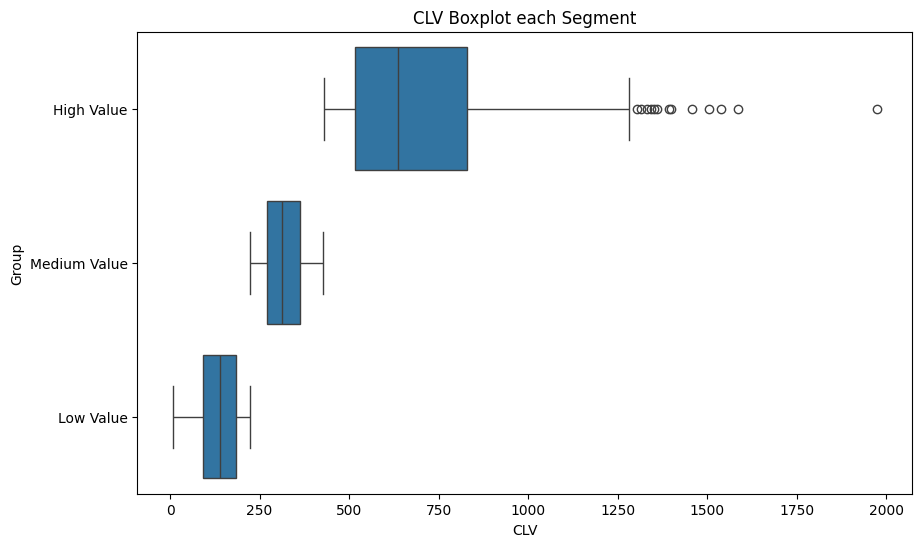

In [27]:
# Set the figure size
plt.figure(figsize=(10, 6))
sns.boxplot(x='CLV', y='Group', data=customer_data)
plt.title('CLV Boxplot each Segment')

In [28]:
# crate CAC ratio column
customer_data['CAC Ratio'] = customer_data['CLV']/75

In [29]:
# check data
customer_data.head()

,Revenue,Frequency,AOV,CLV,Rank,Group,CAC Ratio
0,574.483054,3,191.494351,638.314504,162.0,High Value,8.510860
1,358.671535,4,89.667884,298.892946,526.0,Medium Value,3.985239
2,331.748060,3,110.582687,368.608956,407.0,Medium Value,4.914786
3,331.752551,5,66.350510,221.168367,668.0,Low Value,2.948912
4,1115.931459,5,223.186292,743.954306,108.0,High Value,9.919391


In [30]:
# descibe
customer_data.groupby('Group')['CAC Ratio'].mean()

,CAC Ratio
Group,
High Value,9.417234
Low Value,1.805381
Medium Value,4.225560


# Case 7: Basic CLV formula with Product Information

- Suppose SaaS company wants to estimate the CLV of their customer
- Average monthly retention rate = 75%
- Given information CAC of each subscription type product:
    - Silver: \$20
    - Gold: \$30
    - Platinum: \$35
- What is the CLV of the customer? what the insights we can get?

In [31]:
# Set the random seed for reproducibility
np.random.seed(42)

# Number of customers
num_customers = 1000


# Define the subscription types
subscription_types = ['silver', 'gold', 'platinum']

# Create the dataframe
df = pd.DataFrame({'CustomerID': range(1, num_customers + 1)})
df['SubscriptionType'] = np.random.choice(subscription_types,
                                          size=num_customers)

# Generate MRR values for each subscription type
mean_mrr = {'silver': 30, 'gold': 75, 'platinum': 120}
std_dev_mrr = {'silver': 5, 'gold': 10, 'platinum': 18}

for sub_type in subscription_types:
    mean = mean_mrr[sub_type]
    std_dev = std_dev_mrr[sub_type]
    mrr_data = np.random.normal(loc=mean, scale=std_dev, size=num_customers)

    # Add the MRR values to the dataframe
    cond_type = (df['SubscriptionType'] == sub_type)
    df.loc[cond_type, 'MRR'] = mrr_data[cond_type]

# Add additional columns
df['AddsOn'] = 'yes'

In [32]:
df.head()

,CustomerID,SubscriptionType,MRR,AddsOn
0,1,platinum,95.680661,yes
1,2,silver,25.845249,yes
2,3,platinum,128.673589,yes
3,4,platinum,129.850766,yes
4,5,silver,28.805260,yes


In [33]:
# calculate CLV
df['CLV'] = df['MRR']/(1-0.75)

In [34]:
df.head()

,CustomerID,SubscriptionType,MRR,AddsOn,CLV
0,1,platinum,95.680661,yes,382.722646
1,2,silver,25.845249,yes,103.380998
2,3,platinum,128.673589,yes,514.694356
3,4,platinum,129.850766,yes,519.403065
4,5,silver,28.805260,yes,115.221039


In [35]:
# descibe
df.groupby('SubscriptionType')['CLV'].mean()

,CLV
SubscriptionType,
gold,298.418382
platinum,481.416439
silver,121.941792


In [36]:
# Define the CAC values for each subscription type
cac_values = {'silver': 20, 'gold': 30, 'platinum': 35}

# Calculate the CLV:CAC ratio
df['CAC Ratio'] = df['CLV'] / df['SubscriptionType'].map(cac_values)

In [37]:
# descibe
df.groupby('SubscriptionType')['CAC Ratio'].mean()

,CAC Ratio
SubscriptionType,
gold,9.947279
platinum,13.754755
silver,6.097090


- All customers are still profitable if we implement any marketing implementation
- The CAC:CLV ratio above 1:3
- We can implement aggresively marketing strategy for customer platinum and gold
- But we can only impemlement 'appropriate' marketing strategy with 'appropriate' budget marketing